In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задача 1

Перед вами сгенеренные массивы данных по пользователям сотового оператора. Создайте датафрейм с автоматической индексацией любым способом, который будет иметь колонки:

* `id` - уникальный ID абонента

* `age` - возраст абонента

* `calls_month` - среднее количество звонков, совершаемое абонентом в месяц

* `city` - город проживания



---
Проверьте ID на предмет возможных ошибок. Какого рода такие ошибки могут быть?

Выведите его размерность и описательные статистики.

Покажите графически, есть ли какая-либо взаимосвязь двух признаков
* `age`
* `calls_month`

In [ ]:
n_rows = 500 # количество строк

id = 'ID_' + pd.Series(np.random.choice(range(1000, 2001), size=n_rows, replace=False)).astype(str)
age = pd.Series(np.random.randint(10, 65, n_rows))
calls_month = (0.2* (age-30)**2 + 40 + np.random.randn(n_rows)*30).round().astype(int)
city = [['Bishkek', 'Ohs', 'Naryn', 'Batken', 'Tokmak'][i] for i in np.random.randint(0, 5, n_rows)]

columns = ['id', 'age', 'calls_month', 'city']
data = [id, age, calls_month, city]

In [ ]:
# your code

In [ ]:
df = pd.DataFrame(np.array(data).T, columns=columns)
df

,id,age,calls_month,city
0,ID_1820,62,227,Batken
1,ID_1844,42,108,Batken
2,ID_1847,32,1,Bishkek
3,ID_1883,53,166,Naryn
4,ID_1935,38,55,Ohs
...,...,...,...,...
495,ID_1999,58,261,Batken
496,ID_1828,32,132,Bishkek
497,ID_1415,11,106,Ohs
498,ID_1453,59,202,Naryn


Создадим колонку `balance` которая будет скоррелирована с количеством звонков в месяц. Данная фича будет показывать средний баланс за месяц для абонента. Ниже написана очень импирическая формула (не показывайте ее никому), как можно по одному множеству сгенерить другое множество с заданным коэффициентом корреляции. Сплошная эвристика)))

$$Y = rX + E\sigma_x\sqrt{1-r^2} + bias$$

* Y - получаемое множество
* X - исходное множество
* E - случайный шум (стандартизированное Гаусово распределение)
* r - коэффициент Корреляции Пирсона
* bias - смещение

In [ ]:
r = 0.7
e = np.random.randn(n_rows)
bias = 200
balance = (df.calls_month * r + e*(1-r**2)**.5* df.calls_month.std() + bias).round()

In [ ]:
# your code

Постройте скаттерплот и корр матрицу.

Постройте график по образцу и сделайте выводы.

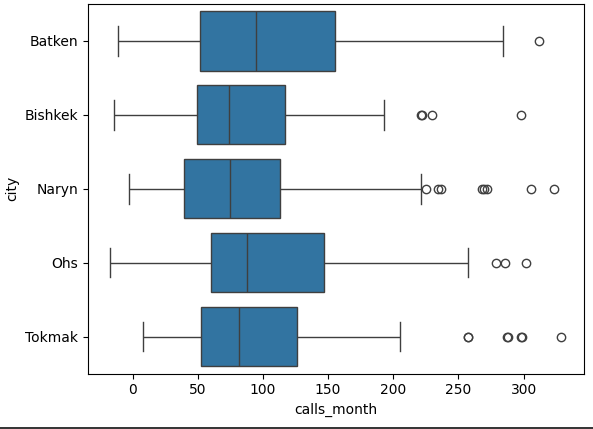

# Задача 2

Для созданного датасета удалите из него тех пользователей, количество звонков в месяц которых меньше, чем значение первого квартиля по данной колонке. Сохраните данный датасет в новую переменную!

In [ ]:
# your code

# Задача 3

Отсортируйте новый датасет по колонке Баланс и выведите по ней топ 10 клиентов! Какой у них средний возраст?

In [ ]:
# your code

# Задача 4

Давайте загрузим реальный датасет по недвижке, который является частью данных, которые мы спарсили с досок объявлений.

Имя файла 'land_bishkek.csv'

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/jd1wrmkxvz7fn3x92fcwd/land_bishkek.csv?rlkey=1t7xlcvq2wetup1jth9e94i3m&dl=0'

--2024-07-31 13:32:32--  https://www.dropbox.com/scl/fi/jd1wrmkxvz7fn3x92fcwd/land_bishkek.csv?rlkey=1t7xlcvq2wetup1jth9e94i3m&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc841ed52154454be3713dd8ecc9.dl.dropboxusercontent.com/cd/0/inline/CXxhQNWumpipvWDRM_GVeJsJXaJzu7EQ6AA9iW8g0PA2xf-X_vkkQrXWdi7OL8KK4fpD2O5uxMB3BX33kpLOFKi7zW7hY4ebJt0fFnOikvBNchi2-DVR5a4AlMdHle1exfQ6UZpEYyFM1g_4b-zLkUKY/file# [following]
--2024-07-31 13:32:33--  https://uc841ed52154454be3713dd8ecc9.dl.dropboxusercontent.com/cd/0/inline/CXxhQNWumpipvWDRM_GVeJsJXaJzu7EQ6AA9iW8g0PA2xf-X_vkkQrXWdi7OL8KK4fpD2O5uxMB3BX33kpLOFKi7zW7hY4ebJt0fFnOikvBNchi2-DVR5a4AlMdHle1exfQ6UZpEYyFM1g_4b-zLkUKY/file
Resolving uc841ed52154454be3713dd8ecc9.dl.dropboxusercontent.com (uc841ed52154454be3713dd8ecc9.dl.dropboxusercontent.com)... 162.125.5.1

In [ ]:
df = pd.read_csv('land_bishkek.csv?rlkey=1t7xlcvq2wetup1jth9e94i3m&dl=0')

In [ ]:
df.head()

,address,price,area,oblast
0,"бишкек, кустанайская",45500.0,240.0,1.0
1,"бишкек, рухий мурас ж/м, рухий-мурас 5-я",50000.0,0.0,1.0
2,"бишкек, ак-ордо ж/м, белек",37000.0,500.0,1.0
3,"бишкек, восточная 5",30000.0,700.0,1.0
4,"бишкек, кызыл-аскер ж/м, кумарыкская 40 а",54000.0,300.0,1.0


In [ ]:
df.oblast.unique()

array([1., 2.])

Нам следует посмотреть на его структуру, выяснить типы данных по колонкам, проверить пропуски, уникальные значения итд.. Посмотрим и обсудим!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   address  400 non-null    object 
 1   price    399 non-null    float64
 2   area     400 non-null    float64
 3   oblast   400 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


Почистим пропуски, нули в важных фичах.

In [ ]:
(df.area==0).sum()

70

In [ ]:
(df.price==0).sum()

0

In [ ]:
df = df[(df.area!=0) & (df.price.notnull())]

In [ ]:
df.shape

(329, 5)

# Задача 5

Обычно цена, которая указывается в объявлении завышена. Для пущей уверенности давайте снизим ее на 5%

In [ ]:
df.price *= .95

<ipython-input-13-3f9409fc360e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price *= .95


In [ ]:
df

,address,price,area,oblast
0,"бишкек, кустанайская",43225.0,240.0,1.0
2,"бишкек, ак-ордо ж/м, белек",35150.0,500.0,1.0
3,"бишкек, восточная 5",28500.0,700.0,1.0
4,"бишкек, кызыл-аскер ж/м, кумарыкская 40 а",51300.0,300.0,1.0
5,"бишкек, кок-жар ж/м",42750.0,400.0,1.0
...,...,...,...,...
395,с. бар-булак,76000.0,40000.0,2.0
396,"с. чон-сары-ой, чон сары ой нет/нет",5700.0,1000.0,2.0
397,"с. бает, проектируемая",6650.0,1200.0,2.0
398,"чолпон-ата, ырыс № 1 № 1",52250.0,5500.0,2.0


# Задача 6

Цена, конечно, это хорошо, но не всегда она информативна для понимания рынка. Давайте создадим новую колонку 'pr_sq', в которой будет указана стоимость одной сотки участка. Площадь участка в датасете представлена в квадратных метрах. 1 сотка - это 100 квадратных метров.

Важно учесть, что если в колонке площади есть пропуски или нули, то это может испортить данные. Давайте сперва выкинем из датасета такие строки, где не указана площадь.

Есть ли рзличия в стоимости земли в регионе 1 и регионе 2?

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df['pr_sq'] = (df.price / df.area *100).round(2)

<ipython-input-18-c815d0cf4a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pr_sq'] = (df.price / df.area *100).round(2)


In [ ]:
df

,address,price,area,oblast,pr_sq
0,"бишкек, кустанайская",43225.0,240.0,1.0,18010.42
2,"бишкек, ак-ордо ж/м, белек",35150.0,500.0,1.0,7030.00
3,"бишкек, восточная 5",28500.0,700.0,1.0,4071.43
4,"бишкек, кызыл-аскер ж/м, кумарыкская 40 а",51300.0,300.0,1.0,17100.00
5,"бишкек, кок-жар ж/м",42750.0,400.0,1.0,10687.50
...,...,...,...,...,...
395,с. бар-булак,76000.0,40000.0,2.0,190.00
396,"с. чон-сары-ой, чон сары ой нет/нет",5700.0,1000.0,2.0,570.00
397,"с. бает, проектируемая",6650.0,1200.0,2.0,554.17
398,"чолпон-ата, ырыс № 1 № 1",52250.0,5500.0,2.0,950.00


<Axes: xlabel='pr_sq', ylabel='Density'>

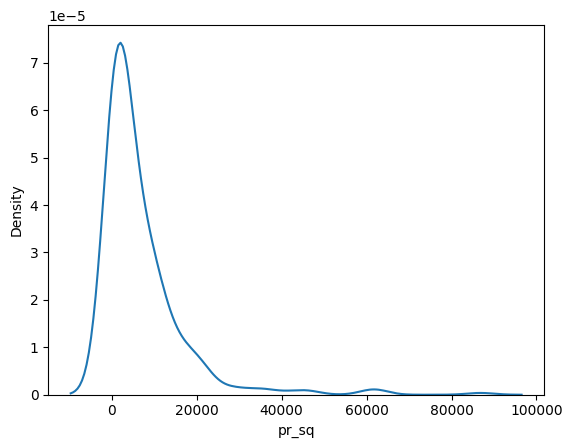

In [ ]:
sns.kdeplot(df.pr_sq)

<Axes: xlabel='pr_sq', ylabel='Density'>

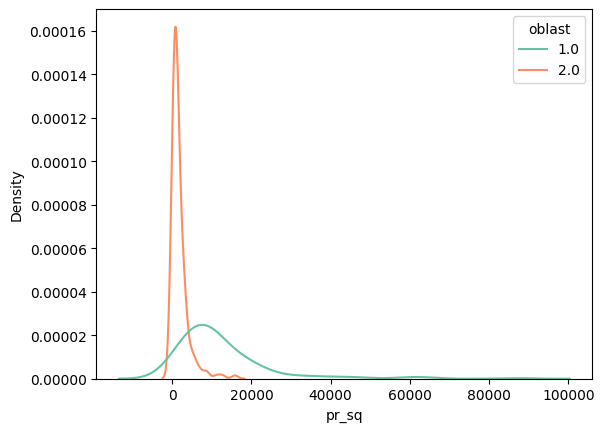

In [ ]:
sns.kdeplot(data=df, x='pr_sq', hue='oblast', palette="Set2")

<Axes: xlabel='pr_sq', ylabel='oblast'>

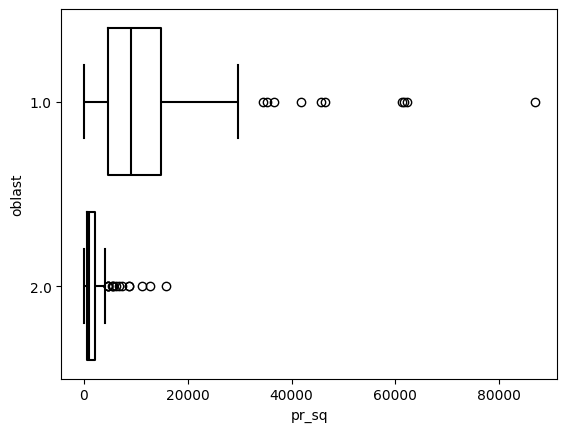

In [ ]:
sns.boxplot(x=df.pr_sq, y=df.oblast.astype(str), fill=None, color='black')

In [ ]:
ttest_ind(df.loc[df.oblast==1, 'pr_sq'], df.loc[df.oblast==2, 'pr_sq'])

TtestResult(statistic=10.771120121086037, pvalue=2.3467011161482555e-23, df=327.0)

In [ ]:
df.shape

(329, 5)

# Задача 7

В датасете есть колонка с адресом. Давайте создадим колонку с названием города\села и ее содержимое достанем из колонки адреса. Новую колонку назовем 'locality'

In [ ]:
df

,address,price,area,oblast,pr_sq
0,"бишкек, кустанайская",43225.0,240.0,1.0,18010.42
2,"бишкек, ак-ордо ж/м, белек",35150.0,500.0,1.0,7030.00
3,"бишкек, восточная 5",28500.0,700.0,1.0,4071.43
4,"бишкек, кызыл-аскер ж/м, кумарыкская 40 а",51300.0,300.0,1.0,17100.00
5,"бишкек, кок-жар ж/м",42750.0,400.0,1.0,10687.50
...,...,...,...,...,...
395,с. бар-булак,76000.0,40000.0,2.0,190.00
396,"с. чон-сары-ой, чон сары ой нет/нет",5700.0,1000.0,2.0,570.00
397,"с. бает, проектируемая",6650.0,1200.0,2.0,554.17
398,"чолпон-ата, ырыс № 1 № 1",52250.0,5500.0,2.0,950.00


In [ ]:
df['locality'] = df.apply(lambda row: 'Бишкек' if row['oblast'] == 1 else
         row['address'].split(', ')[0].replace('с. ', '').title(), axis=1)

In [ ]:
df

,address,price,area,oblast,pr_sq,locality
0,"бишкек, кустанайская",43225.0,240.0,1.0,18010.42,Бишкек
2,"бишкек, ак-ордо ж/м, белек",35150.0,500.0,1.0,7030.00,Бишкек
3,"бишкек, восточная 5",28500.0,700.0,1.0,4071.43,Бишкек
4,"бишкек, кызыл-аскер ж/м, кумарыкская 40 а",51300.0,300.0,1.0,17100.00,Бишкек
5,"бишкек, кок-жар ж/м",42750.0,400.0,1.0,10687.50,Бишкек
...,...,...,...,...,...,...
395,с. бар-булак,76000.0,40000.0,2.0,190.00,Бар-Булак
396,"с. чон-сары-ой, чон сары ой нет/нет",5700.0,1000.0,2.0,570.00,Чон-Сары-Ой
397,"с. бает, проектируемая",6650.0,1200.0,2.0,554.17,Бает
398,"чолпон-ата, ырыс № 1 № 1",52250.0,5500.0,2.0,950.00,Чолпон-Ата


# Задача 8

Если в названии населенного пункта присутствует "с." - то это село. Если не присутствует, то это город. Необходимо создать колонку 'type', в которой в зависимости от типа населенного города будут два значения: 'сity' или 'village'.

Покажите графически различия (если они есть) в стоимости земли в селе и городе.

# Задача 9

Самое время поговорить об оутлаерах или выбросах. Очевидно, что не все данные заполняются корректно в силу человеческого фактора. В них могут присутствовать экстремальные значения, которые можно и нужно удалить применяя статистические функции. Самой распространенной методикой является удаление по перцентилям - по 2.5 - 5 % с каждой стороны.

Давайте повыкидываем "хвосты" по 3 %, но только не для всего датасета, а по регионам. Само собой разумеется, что слишком маленькая стоимость участка для бишкека не будет ситаться таковой для села Ошской области..))

После проведенных операций давайте оценим, как уменьшился наш датасет!

In [ ]:
# mask_1 = (df.price[df.oblast == 1] > df.price[df.oblast == 1].quantile(.03)) & (df.price[df.oblast == 1] < df.price[df.oblast == 1].quantile(.97))


In [ ]:
# mask_2 = (df.price[df.oblast == 2] > df[df.oblast == 2].price.quantile(.03)) & (df[df.oblast == 2].price < df[df.oblast == 2].price.quantile(.97))


In [ ]:
df.pr_sq.quantile([.03, .97]).tolist()

[186.884, 30388.825999999848]

In [ ]:
left_dict = {obl:df.loc[df.oblast==obl, 'pr_sq'].quantile(.03).tolist()
  for obl in df.oblast.unique()}
right_dict = {obl:df.loc[df.oblast==obl, 'pr_sq'].quantile(.97).tolist()
  for obl in df.oblast.unique()}

In [ ]:
left_dict, right_dict

({1.0: 1230.6862999999996, 2.0: 68.1856},
 {1.0: 45850.49279999999, 2.0: 7339.428400000004})

In [ ]:
df['left_bord'] = df.oblast.map(left_dict)
df['right_bord'] = df.oblast.map(right_dict)

In [ ]:
df.shape

(329, 8)

In [ ]:
df = df[(df.pr_sq >= df.left_bord) & (df.pr_sq <= df.right_bord)]

<Axes: xlabel='pr_sq', ylabel='oblast'>

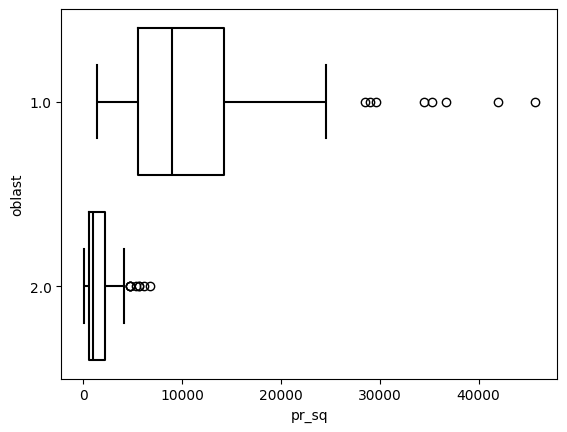

In [ ]:
sns.boxplot(x=df.pr_sq, y=df.oblast.astype(str), fill=None, color='black')